In [ ]:
import torch

In [ ]:
tensor1 = torch.tensor([1, 2, 3, 4])

In [ ]:
print(tensor1)

tensor([1, 2, 3, 4])


In [ ]:
tensor2 = torch.rand(2,3)

In [ ]:
print(tensor2)

tensor([[0.1699, 0.1527, 0.0899],
        [0.3207, 0.7431, 0.0673]])


In [ ]:
tensor3 = torch.zeros(3,3)

In [ ]:
print(tensor3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


Broadcasting

In [ ]:
result1 = tensor1 + 5

In [ ]:
print(result1)

tensor([6, 7, 8, 9])


In [ ]:
result2 = tensor2 *3

In [ ]:
print(result2)

tensor([[0.5098, 0.4581, 0.2697],
        [0.9620, 2.2292, 0.2020]])


MAtrix Multiplication

In [ ]:
matrix1 = torch.rand((2,3))
matrix2 = torch.rand((3,1))

# output should be 2x1
# 2 rows and 1 column
result3 = matrix1.matmul(matrix2)
print(result3)

tensor([[0.6176],
        [0.5823]])


In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
class MyDataset(Dataset):
  def __init__(self):
    # 100 data points, 5 features
    # n_rows x n_cols
    self.data = torch.rand((100, 5))

    # labels would be integers between 0 and 1
    # So upper bound (non-inclusive) would be 2
    # low_range, hi_range, shape => 1D vector with 100 labels
    self.labels = torch.randint(0, 2,(100,))

  def __len__(self):
    return len(self.data)


  def __getitem__(self, idx):
    """

    Args:
      idx:

    Returns:

    """
    # return  data, corresponding label
    return self.data[idx], self.labels[idx]


In [ ]:
dataset = MyDataset()
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)

In [ ]:
# Iterate through the dataloader

for batch_idx, (features, labels) in enumerate(dataloader):
  print(f"Batch {batch_idx+1}")
  print("Features:", features)
  print("Labels:", labels)


Batch 1
Features: tensor([[0.2956, 0.5921, 0.7913, 0.1804, 0.9746],
        [0.3376, 0.9602, 0.6841, 0.7531, 0.5780],
        [0.1619, 0.3553, 0.3861, 0.7500, 0.1725],
        [0.2213, 0.9107, 0.4161, 0.4716, 0.2196],
        [0.0556, 0.5054, 0.3131, 0.3479, 0.9775],
        [0.1051, 0.5538, 0.8352, 0.1392, 0.3564],
        [0.8557, 0.9997, 0.0204, 0.4362, 0.5478],
        [0.8502, 0.1523, 0.9537, 0.7420, 0.0557],
        [0.3190, 0.5240, 0.9180, 0.6099, 0.4614],
        [0.6100, 0.4909, 0.0134, 0.8335, 0.6031]])
Labels: tensor([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])
Batch 2
Features: tensor([[0.0884, 0.3301, 0.9439, 0.4779, 0.6844],
        [0.2876, 0.6699, 0.6992, 0.3782, 0.8498],
        [0.9382, 0.6629, 0.0297, 0.9481, 0.3536],
        [0.5426, 0.9914, 0.8055, 0.8196, 0.5907],
        [0.5085, 0.3753, 0.5553, 0.7129, 0.5241],
        [0.2071, 0.7660, 0.6635, 0.4027, 0.9842],
        [0.2082, 0.2684, 0.6792, 0.3298, 0.8215],
        [0.5349, 0.5158, 0.6345, 0.6948, 0.4543],
        [0.7116,

Dealing with numbers and operations

In [ ]:
# scalar value with gradient tracking
# torch keeps track of the variable in the computation graph

x = torch.tensor(2.0, requires_grad = True)
# x = torch.tensor(2.0, requires_grad = False)

z = torch.tensor([2.0, 4.1], requires_grad= True)


# compute a function [y = x^3]
# y = x ** 3
y = z[0]**2 + z[1]

# compute the gradient dy/dx
y.backward()

# use .item() for using the value instead of the object
# print("the gradient is", x.grad.item())

# convert .tolist() / .numpy()
print("the gradient is", z.grad)
print("the gradient is", z.grad.tolist())



the gradient is tensor([4., 1.])
the gradient is [4.0, 1.0]


Operations

In [ ]:
# Tensor with values from 0 to 9
x = torch.arange(0,10).float()
y = x**2 + 3*x + 2

# efficiently eliminate loops
print("The value are:", y.tolist())

The value are: [2.0, 6.0, 12.0, 20.0, 30.0, 42.0, 56.0, 72.0, 90.0, 110.0]


Broadcasting

In [ ]:
# shape = matrix
x = torch.rand((3,4))

# shape = vector [1x4]
y = torch.rand((4,))

result = x + y
print(result.shape)


print(result.tolist())

torch.Size([3, 4])
[[0.6904134154319763, 0.43038010597229004, 0.790789783000946, 1.1854450702667236], [1.1602848768234253, 1.0291558504104614, 0.6312147378921509, 1.38645601272583], [0.7209922075271606, 0.4831116795539856, 1.0817900896072388, 0.8606743812561035]]


In [ ]:
import torch

Neural Network

In [ ]:
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    # input shape => (batch_size = 10, num_features = 5)
    # Hence input_size = num_features

    # hidden_size = 50
    # more capacity to learn richer representations

    # output shape => (batch_size = 10, num_clases = 2)

    super(SimpleNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    # relu adds non-linearity to
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = SimpleNet(5, 50, 2)

# batch of 10 samples, 5 features
example_input = torch.rand(10, 5)

# forward pass
output = model(example_input)



print("Input Shape: ", example_input.shape)
print("Output Shape: ", output.shape)





Input Shape:  torch.Size([10, 5])
Output Shape:  torch.Size([10, 2])


In [ ]:
import torch

Install transformers

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Add a linear classification layer on top of BERT
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 2)


# tokenize a sample sentence
text = "PyTorch is great for neural networks!"
inputs = tokenizer(text, return_tensors = "pt", padding = True, truncation = True, max_length = 512)

outputs = model(**inputs)
print("Logits: ", outputs.logits)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Logits:  tensor([[-0.6568,  0.8689]], grad_fn=<AddmmBackward0>)


In [ ]:
print(outputs.logits.tolist())

[[-0.6567812561988831, 0.8688869476318359]]


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
  # def __init__(self, input_size / num_features, hidden_size, num_classes):
  def __init__(self):
    super(MyDataset, self).__init__()
    # 100 samples with 5 features each
    self.data = torch.rand(100, 5)

    # labeled 0,1
    self.labels = torch.randint(0, 2, (100,))


  def __len__(self):
    return len(self.data)


  def __getitem__(self, idx):
    # features, labels
    return self.data[idx], self.labels[idx]

CHECK FOR GPU PRESENCE

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.rand((2,2)).to(device)
print(tensor.shape, tensor.dtype, tensor.device)
tensor = torch.rand(2,2).to(device)
print(tensor.shape, tensor.dtype, tensor.device)

torch.Size([2, 2]) torch.float32 cpu
torch.Size([2, 2]) torch.float32 cpu


In [ ]:
# train_dataloader = Dataloader(training_data, batch_size = 64, shuffle = True)

# train_features, train_labels = next(iter(train_dataloader))

OPENAI - QUESTIONS

In [ ]:
import torch

In [ ]:
## PROBLEM - 1

def scale_and_add(matrix, vector, scale):
  # matrix => size m x n

  # scale all the elements of matrix by scale

  matrix = matrix * scale

  # add vector to each row of the scaled matrix

  # broadcast
  matrix = matrix + vector

  return matrix


# matrix = torch.rand((1,2))

scale = torch.tensor(2)
vector = torch.tensor([1, 1])
matrix = torch.tensor([[1,2], [2,4]])
print(scale_and_add(matrix, vector, scale))

tensor([[3, 5],
        [5, 9]])


In [ ]:
## PROBLEM  - 2

import torch
from torch.utils.data import DataLoader, Dataset


class SquareDataset(Dataset):
  def __init__(self, n):
    # num_samples = n, num_features = 1
    self.data = torch.randint(1, 100, (n,))
    self.labels = torch.tensor([x**2 for x in self.data])

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

n = 3
train_sd = SquareDataset(n)
train_loader = DataLoader(train_sd, batch_size = 5, shuffle = True)

# trainloader IS an iterator
train_loader = next(iter(DataLoader(train_sd, batch_size = 5, shuffle = True)))


print(train_loader[0])

features, labels = train_loader
print(features)
print(labels)

print(features.shape, features.dtype)

tensor([54, 71, 26])
tensor([54, 71, 26])
tensor([2916, 5041,  676])
torch.Size([3]) torch.int64


In [ ]:
# PROBLEM - 3

import torch
import torch.nn as nn

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    # nn.ReLU
    x = torch.relu(self.fc1(x))
    out = self.fc2(x)
    return out


model = NeuralNet(8, 32, 4)
data_point = torch.rand((16, 8))

out = model(data_point)

print(out.shape)

torch.Size([16, 4])


In [ ]:
x = torch.tensor(2.0, requires_grad= True)

y = 3*x**3 + 2*x**2 + x

# compute dy/dx
y.backward()

print(x.grad)

tensor(45.)


In [ ]:
x = torch.rand((3,))
x.requires_grad = True

y = x**2 + 3*x + 5

y.backward(torch.tensor([1.0, 1.0, 1.0]))

print(x.grad)

tensor([3.9861, 4.6676, 4.0051])


In [ ]:
import torch

In [ ]:
# torch.rand(size)
x = torch.rand(1)
print(x.shape, x.dtype)

torch.Size([1]) torch.float32


CNNs

In [ ]:
import torch
import torch.nn as nn

class ConvSigmoidNet(nn.Module):
  def __init__(self):
    super().__init__()

    # grayscale image => point[x,y] in the image has only single value
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size =3, stride = 1, padding  = 1)

    # Sigmoid is used for binary classification
    self.sigmoid = nn.Sigmoid()


  def forward(self,x):
    x = self.conv1(x)
    out = self.sigmoid(x)
    return out

# instantiate the model
model = ConvSigmoidNet()

# batch_size, channel, height, width
input_tensor = torch.rand(1, 1, 5, 5)


output = model(input_tensor)
print(input_tensor.shape)
print(output.shape)
print(output)
print(output.grad_fn)

torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 5, 5])
tensor([[[[0.5134, 0.4861, 0.4494, 0.4684, 0.4885],
          [0.5042, 0.6183, 0.6421, 0.5537, 0.5715],
          [0.5490, 0.5040, 0.4689, 0.5338, 0.5946],
          [0.5433, 0.5409, 0.5765, 0.5397, 0.5106],
          [0.5652, 0.5529, 0.5186, 0.5972, 0.5807]]]],
       grad_fn=<SigmoidBackward0>)


RNN FOR SEQUENCE CLASSIFICATION

TYG-1]

Epoch [10/100], Loss: 0.6902
Epoch [20/100], Loss: 0.6885
Epoch [30/100], Loss: 0.6874
Epoch [40/100], Loss: 0.6867
Epoch [50/100], Loss: 0.6860
Epoch [60/100], Loss: 0.6855
Epoch [70/100], Loss: 0.6849
Epoch [80/100], Loss: 0.6844
Epoch [90/100], Loss: 0.6839
Epoch [100/100], Loss: 0.6835


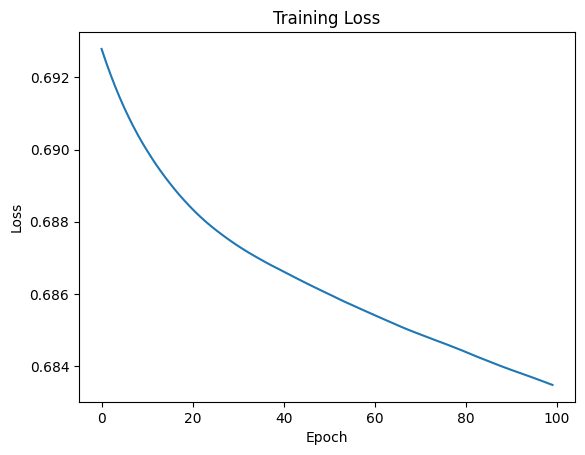

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Activation for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU to hidden layer
        out = self.sigmoid(self.fc2(x))  # Apply Sigmoid to output
        return out

# Generate synthetic data
torch.manual_seed(42)  # For reproducibility
data = torch.rand(100, 2)  # 100 samples, 2 features each
labels = torch.randint(0, 2, (100,)).float()  # Binary labels (0 or 1)

# Define model, loss, and optimizer
model = NeuralNet(input_size=2, hidden_size=10, num_classes=1)  # 1 output for binary classification
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

# Training loop
losses = []
epochs = 100
for epoch in range(epochs):
    # Forward pass
    predictions = model(data)  # Predictions
    loss = criterion(predictions.squeeze(), labels)  # Calculate loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Record loss
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot loss over epochs
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    # init
    super().__init__()

    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

    # ReLU is used for hidden layers
    self.relu = nn.ReLU

    # Sigmoid is used for binary classification
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    out = self.sigmoid(x)

    return out

In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
  def __init__(self):
    self.data = []
    self.labels = labels


  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(device)

cuda


In [ ]:
# We have different shapes in PyTorch
# This shape is a vector [we got scalars and matrix as well]

tensor1 = torch.rand((5,))

In [ ]:
print(tensor1.shape)
print(tensor1.dtype)
print(tensor1.device)

torch.Size([5])
torch.float32
cpu


In [ ]:
print(tensor1.tolist())

[0.8076955676078796, 0.06863945722579956, 0.23455482721328735, 0.8763377666473389, 0.3552449345588684]


In [ ]:
# define x as a scalar

x = torch.rand(1)

# set gradient accumulation to true
# Now x's gradients would be tracked in the computation graph
x.requires_grad = True

y = x**2 + 3

# compute dy/dx
y.backward()

print(x.grad)
print(x.shape)
print(x.dtype)
print(x.tolist())
print(x.ndim)

tensor([1.7437])
torch.Size([1])
torch.float32
[0.871849536895752]
1


In [ ]:
class NeuralNet(nn.Module):
  # input_layers [features] , hidden_layers [complexity], num_classes

  def __init__(self, input_size, hidden_size, num_classes):
    # nn.Linear + nn.ReLU
    # nn.Sequential
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

    # Use a relu layer for learning between hidden layers
    # Or it will just be a linear transformation
    # Degrees of freedom of learning / complexity of the equation
    self.relu = nn.ReLU()


  # forward pass
  # loss.backward() for the backward pass => uodating the weights
  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    out = self.relu(x)

    return out